In [1]:
#1. 输入库
import numpy as np
import pandas as pd

#2. 打开d带中心数据
with open('ML_DATA.csv', encoding = 'UTF-8') as f:
    df = pd.read_csv(f, index_col = 0)  #index_col=0 告诉第一列是索引

#剔除描述符
excluded = ['D1','D2','D5','D6','D7','D8','D9','D10','D12','D13','D14','D18','D21','D25']
df_new = df.drop(excluded, axis = 1)

#如果考虑删除某些点，用下面的命令
#excluded_row = [19, 21]
#df_new = df_new.drop(excluded_row, axis=0)


#设置自变量和因变量
y = df_new['y'].values
X_1 = df_new.drop('y', axis = 1)

#归一化
df = pd.DataFrame(X_1)
X = df.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

#切割数据
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 1)    # 把样品分为测试和验证集，用split进行分割，测试集的比例为0.2，random_state意思是随机切割、抽取

1. 进行随机森林算法【不交叉验证】

In [2]:
from sklearn import tree
from sklearn.metrics import mean_squared_error
import numpy as np

clf = tree.DecisionTreeRegressor()  #进行决策树回归
clf = clf.fit(X_train, y_train)   #进行拟合


y_pred_train_clf = clf.predict(X_train)
y_pred_test_clf = clf.predict(X_test)

training R2 = 1.000
test R2 = -1.592
RMSE(training)0.000
RMSE(test)13.441


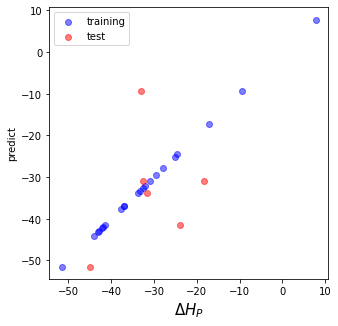

In [3]:
#作图
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
plt.scatter(y_train, y_pred_train_clf, alpha = 0.5, color = 'blue', label = 'training')
plt.scatter(y_test, y_pred_test_clf, alpha = 0.5, color = 'red', label = 'test')
plt.legend()
plt.xlabel('$ΔH_P$', fontsize=15, fontname='Times New Roman')
plt.ylabel('predict')

plt.savefig(r'C:/Users/Administrator.DESKTOP-CDML10A/Desktop/决策树不交叉验证.tiff', dpi = 360)

#10. 算均方误差
from sklearn.metrics import mean_squared_error #引用均方差

print('training R2 = %.3f' %clf.score(X_train, y_train))
print('test R2 = %.3f' %clf.score(X_test, y_test))
rmse_tr_clf = mean_squared_error(y_train, y_pred_train_clf, squared = False) #squared = False 是表示对均方差求根，及得到均方根误差
rmse_te_clf = mean_squared_error(y_test, y_pred_test_clf, squared = False)
print('RMSE(training)%.3f'%rmse_tr_clf)
print('RMSE(test)%.3f'%rmse_te_clf)

2. 进行决策树回归算法【10折交叉验证】

In [12]:
#进行决策树算法
from sklearn.ensemble import RandomForestRegressor

clf = tree.DecisionTreeRegressor()  #进行决策树回归
clf = clf.fit(X, y)   #进行拟合

from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits = 7, shuffle = True)  #shuffle是进行打乱的意思，在交叉验证之前进行打乱
r2_scores = cross_val_score(clf, X, y, scoring = 'r2', cv = crossvalidation)  #cv是分类方式，这里是交叉验证
rmse_scores = cross_val_score(clf, X, y, scoring = 'neg_root_mean_squared_error',
                             cv = crossvalidation)

print('Cross-validation results:')
print('Fold: %i, mean R2: %.3f' %(len(r2_scores), np.mean(r2_scores)))
print('Fold: %i, mean RMSE: %.3f' %(len(rmse_scores), -np.mean(rmse_scores)))

Cross-validation results:
Fold: 7, mean R2: -2.573
Fold: 7, mean RMSE: 14.649


In [13]:
from sklearn.model_selection import cross_val_predict
y_cv = cross_val_predict(clf, X, y, cv = crossvalidation)

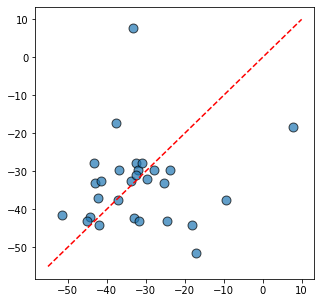

In [14]:
plt.figure(figsize = (5, 5))
plt.plot([-55, 10], [-55, 10], 'r--')
plt.scatter(y, y_cv, s = 80, edgecolor = 'k', alpha = 0.7)

plt.savefig(r'C:/Users/Administrator.DESKTOP-CDML10A/Desktop/决策树7折交叉验证.tiff', dpi = 360)